In [37]:
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.set_theme()

In [38]:
wine = load_wine()

data = wine.data
target = wine.target

data = pd.DataFrame(data)
data['target'] = target

X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = pd.DataFrame(pd.Categorical.from_codes(wine.target, wine.target_names), columns = ['wine_class'])

<Axes: ylabel='Density'>

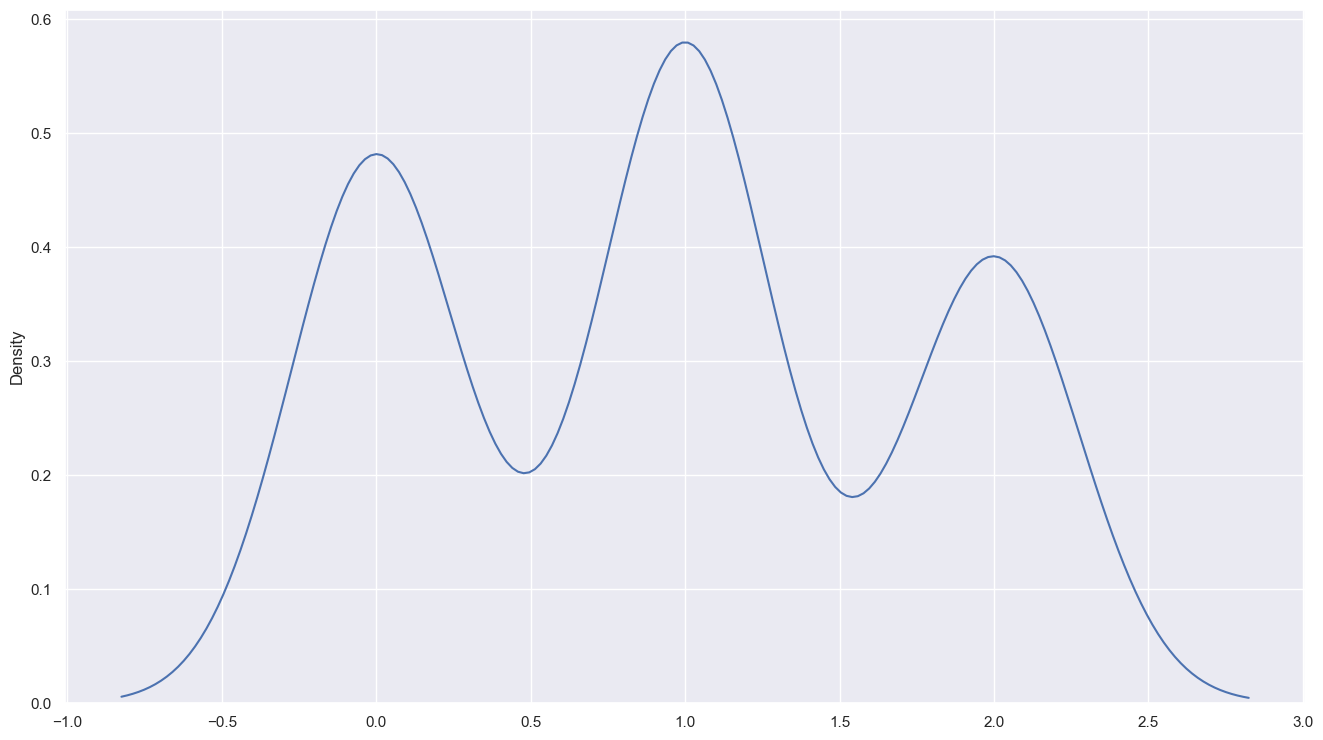

In [39]:
sns.kdeplot(data = target)

In [40]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [41]:
y.head()

,wine_class
0,class_0
1,class_0
2,class_0
3,class_0
4,class_0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((151, 13), (27, 13), (151, 1), (27, 1))

In [43]:
gmm = GaussianMixture(n_components = 3, random_state=50, covariance_type="full", verbose = 2, verbose_interval = 1)
gmm.fit(X)

Initialization 0
  Iteration 1	 time lapse 0.00939s	 ll change inf
  Iteration 2	 time lapse 0.00020s	 ll change 0.09181
  Iteration 3	 time lapse 0.00020s	 ll change 0.07993
  Iteration 4	 time lapse 0.00017s	 ll change 0.02928
  Iteration 5	 time lapse 0.00016s	 ll change 0.02734
  Iteration 6	 time lapse 0.00016s	 ll change 0.04704
  Iteration 7	 time lapse 0.00016s	 ll change 0.01843
  Iteration 8	 time lapse 0.00016s	 ll change 0.01707
  Iteration 9	 time lapse 0.00050s	 ll change 0.04957
  Iteration 10	 time lapse 0.00017s	 ll change 0.02645
  Iteration 11	 time lapse 0.00018s	 ll change 0.03791
  Iteration 12	 time lapse 0.00018s	 ll change 0.05077
  Iteration 13	 time lapse 0.00017s	 ll change 0.00992
  Iteration 14	 time lapse 0.00018s	 ll change 0.00653
  Iteration 15	 time lapse 0.00017s	 ll change 0.00513
  Iteration 16	 time lapse 0.00017s	 ll change 0.00311
  Iteration 17	 time lapse 0.00096s	 ll change 0.00183
  Iteration 18	 time lapse 0.00420s	 ll change 0.00047
Initia

GaussianMixture(n_components=3, random_state=50, verbose=2, verbose_interval=1)

In [44]:

gmm.weights_

array([0.29789875, 0.34586417, 0.35623708])

In [45]:
gmm.means_

array([[1.30152258e+01, 2.99167919e+00, 2.41774130e+00, 2.03987866e+01,
        1.02732859e+02, 1.86485785e+00, 1.01065378e+00, 4.35909429e-01,
        1.34993269e+00, 6.45929341e+00, 7.73457507e-01, 1.99016898e+00,
        6.77936558e+02],
       [1.36487205e+01, 1.89301763e+00, 2.44224824e+00, 1.75027832e+01,
        1.05792456e+02, 2.81100844e+00, 2.93666388e+00, 2.94993944e-01,
        1.88341313e+00, 5.35438111e+00, 1.07445213e+00, 3.13311499e+00,
        1.08634973e+03],
       [1.23591713e+01, 2.21875795e+00, 2.25015482e+00, 2.06732696e+01,
        9.13654548e+01, 2.15403303e+00, 2.00010159e+00, 3.64839121e-01,
        1.50840698e+00, 3.59868735e+00, 9.97714554e-01, 2.62517401e+00,
        4.74985241e+02]])

In [46]:
gmm.covariances_

array([[[ 4.39384364e-01,  3.39595913e-01,  3.37575589e-02,
          3.21375246e-01, -1.98476649e+00,  5.79760962e-03,
         -7.22605643e-02,  2.21302923e-02, -4.45182580e-02,
          9.90507541e-01, -4.15639570e-02, -7.47590085e-02,
         -9.46327076e+00],
        [ 3.39595913e-01,  1.63976408e+00,  7.15459329e-02,
          1.18868515e+00, -6.25550581e+00, -1.67142147e-01,
         -3.02546821e-01,  4.77901936e-02, -2.65177455e-01,
          1.01946160e+00, -9.48856628e-02, -1.96771114e-01,
         -2.66499223e+01],
        [ 3.37575589e-02,  7.15459329e-02,  4.73848644e-02,
          3.30372878e-01, -8.64382968e-01,  2.68418001e-02,
          1.32172546e-02,  1.42340622e-03, -1.17762595e-02,
          9.48692196e-02, -6.10789993e-03,  1.27211219e-02,
         -5.52876618e+00],
        [ 3.21375246e-01,  1.18868515e+00,  3.30372878e-01,
          7.51184192e+00, -1.50229720e+01, -1.91063499e-01,
         -8.87997537e-01,  1.35085158e-01, -2.72826535e-01,
          2.8663184

In [47]:
print('Iterations done by GMM: ', gmm.n_iter_)

Iterations done by GMM:  18


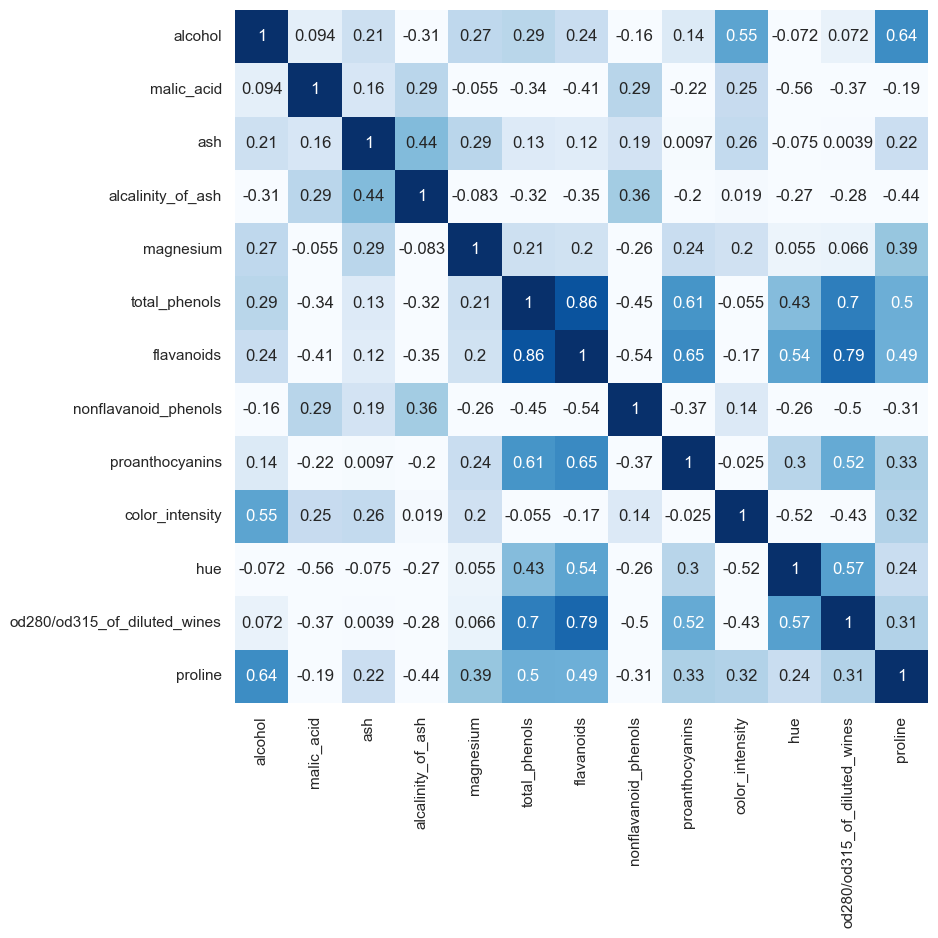

In [48]:
corr = X.corr()
sns.heatmap(corr, cbar=0, vmax=1, vmin=0, square=True, annot=True, cmap='Blues')
plt.show()

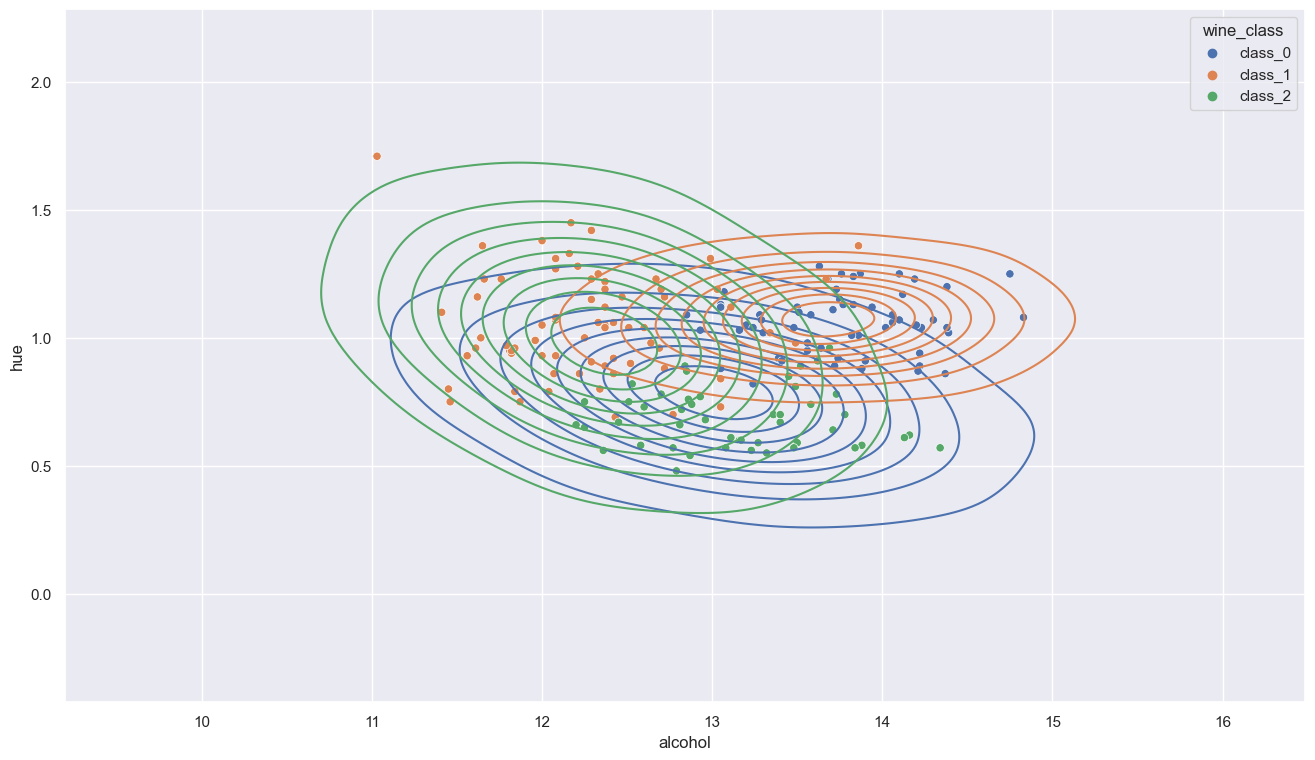

In [49]:
sns.scatterplot(data = X, x = 'alcohol', y = 'hue', hue = y.wine_class)

# loop through the 3 components of the GMM that was generated by the E-M algorithm
for k in range(3):
    g = multivariate_normal(gmm.means_[k], gmm.covariances_[k])
    samples = g.rvs(int(gmm.weights_[k] * 10_000))
    sns.kdeplot(x = samples[:,0], y = samples[:,10], bw_adjust = 2)
    
plt.show()

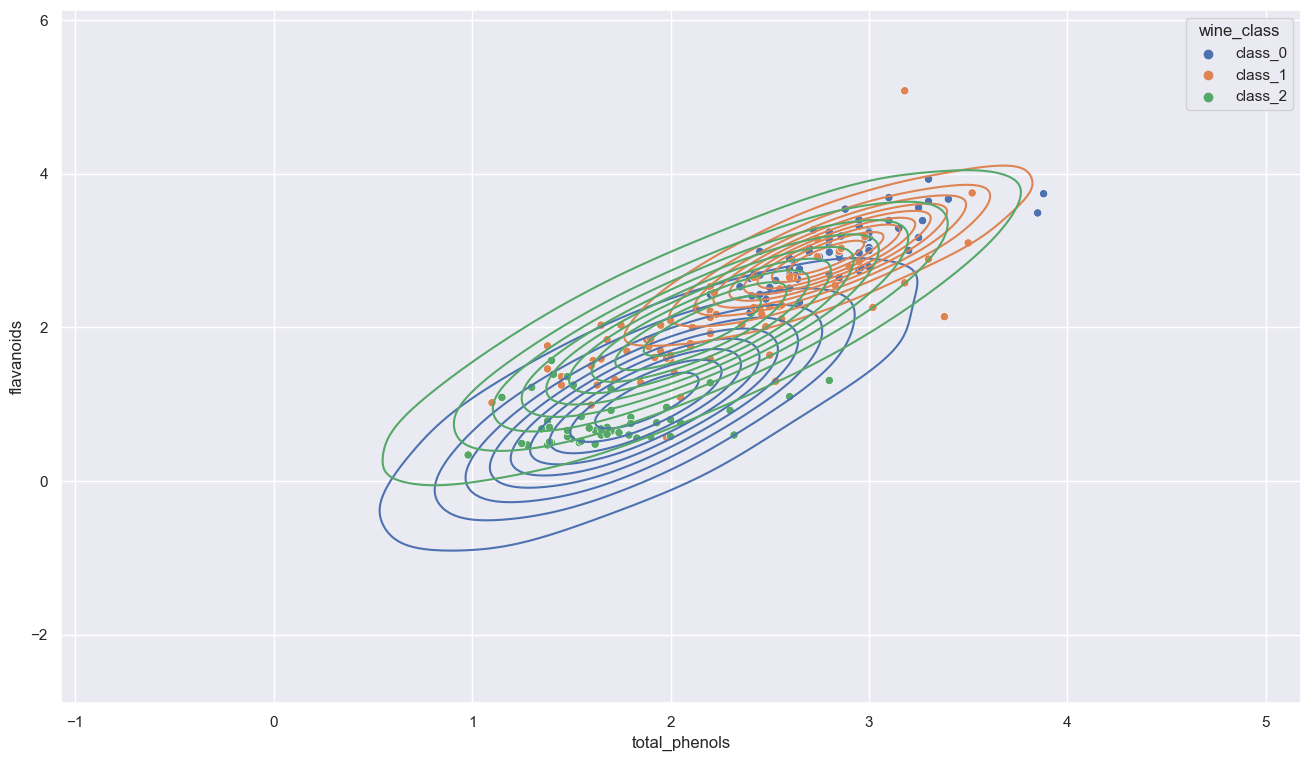

In [50]:
sns.scatterplot(data = X, x = 'total_phenols', y = 'flavanoids', hue = y.wine_class)

# loop through the 3 components of the GMM that was generated by the E-M algorithm
for k in range(3):
    g = multivariate_normal(gmm.means_[k], gmm.covariances_[k])
    samples = g.rvs(int(gmm.weights_[k] * 10_000))
    sns.kdeplot(x = samples[:,5], y = samples[:,6], bw_adjust = 2)
    
plt.show()

In [51]:
# run the EM algorithm 100 times and select the best one
gmm = GaussianMixture(n_components = 3, n_init = 100, random_state=50, covariance_type="full")
gmm.fit(X)

ll = gmm.lower_bound_

print('Iterations done by GMM: ', gmm.n_iter_)
print('The returned gmm has a log likelihood of', ll)

Iterations done by GMM:  13
The returned gmm has a log likelihood of -16.28906476250549


In [52]:
y_pred_components = gmm.predict(X)
y_pred_components

array([2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1])

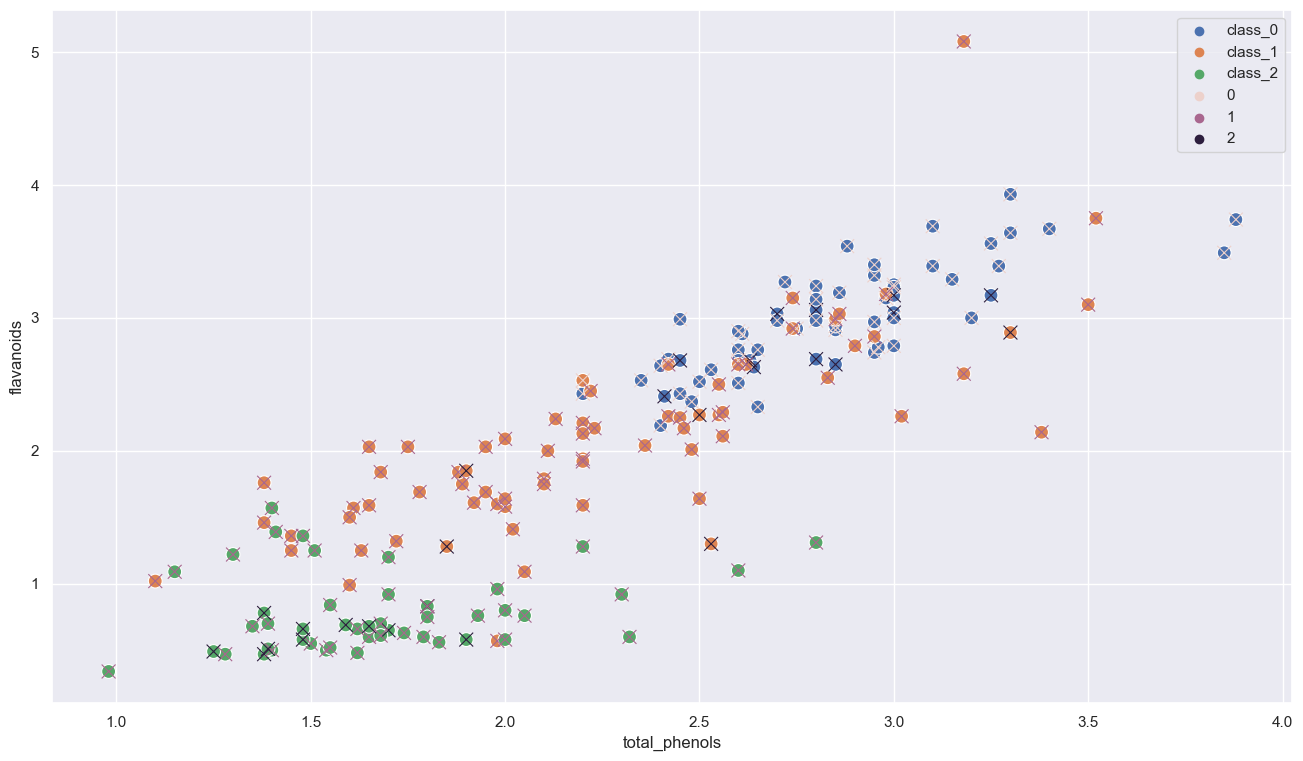

In [53]:
sns.scatterplot(data = X, x = 'total_phenols', y = 'flavanoids', s = 100, marker = 'o', hue = y.wine_class)
sns.scatterplot(data = X, x = 'total_phenols', y = 'flavanoids', s = 100, marker = 'x', hue = y_pred_components)

plt.show() 

In [54]:
prob = gmm.predict_proba(X)
prob

array([[2.85953272e-003, 5.81608762e-019, 9.97140467e-001],
       [1.00000000e+000, 4.56370208e-013, 2.29592501e-013],
       [1.00000000e+000, 8.75354700e-012, 2.08211259e-011],
       [1.00000000e+000, 5.87408317e-026, 2.41204155e-033],
       [1.01359412e-006, 9.13517853e-006, 9.99989851e-001],
       [1.00000000e+000, 3.95340825e-027, 7.90517687e-018],
       [1.00000000e+000, 2.11283749e-020, 4.10891013e-016],
       [9.99992097e-001, 8.56163749e-020, 7.90261454e-006],
       [1.00000000e+000, 7.41205384e-016, 2.32268902e-018],
       [9.99999494e-001, 1.05266153e-011, 5.05650213e-007],
       [1.00000000e+000, 6.87562789e-024, 8.67199802e-015],
       [1.00000000e+000, 1.23476205e-016, 1.38241445e-023],
       [1.00000000e+000, 9.28224635e-019, 3.45995571e-018],
       [1.00000000e+000, 2.68397966e-025, 1.41999728e-018],
       [1.00000000e+000, 4.56989204e-033, 1.06912882e-030],
       [1.00000000e+000, 2.38294306e-016, 2.26249534e-017],
       [1.00000000e+000, 2.64108821e-019

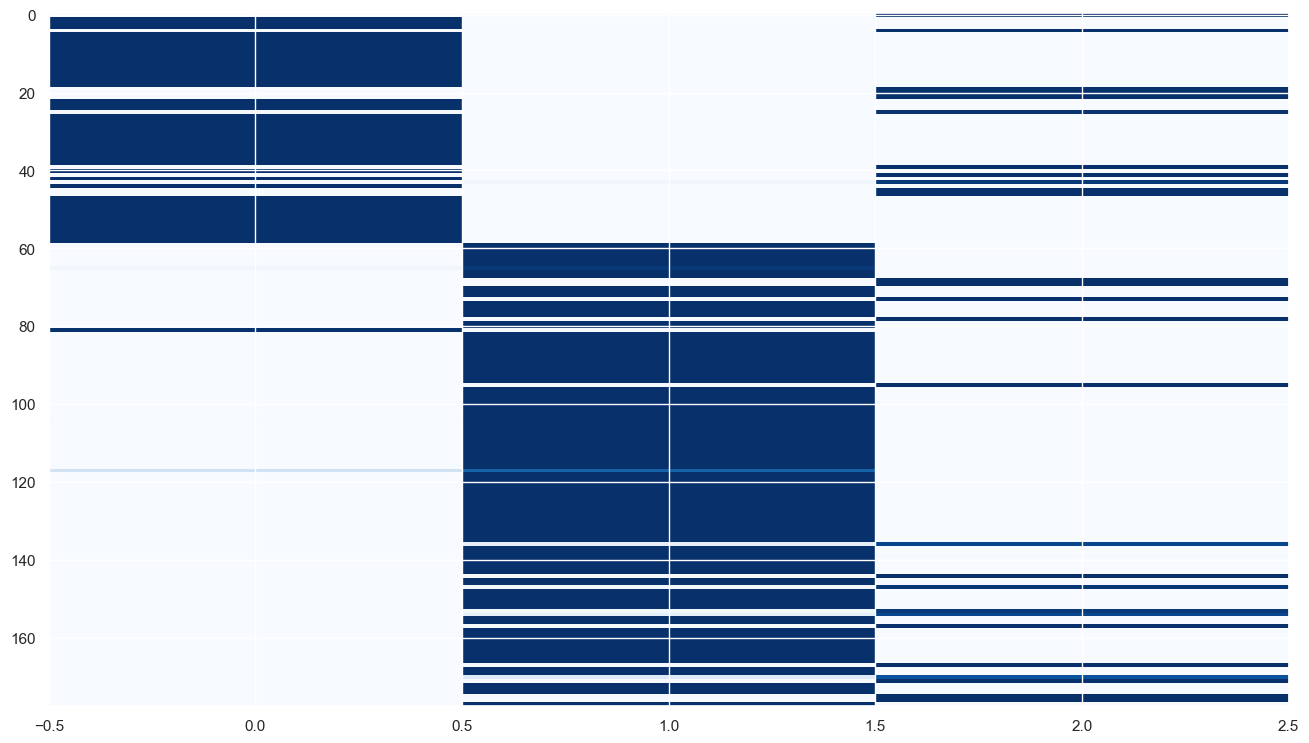

In [55]:


plt.imshow(prob, aspect = 'auto', interpolation = 'nearest', cmap='Blues')
plt.show()